<center>
<h4>Universidad Nacional de Córdoba - Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h4>
<h3> Análisis y Visualización de Datos </h3>
</center>


# Distribuciones de probabilidad

En esta notebook vamos a ver cómo computar distintas probabilidades y realizar distintos gráficos.

In [1]:
import io
import pandas
import seaborn

print(seaborn.__version__)

0.10.1


Nota: la primera versión de esta notebook está ejecutada con un conjunto de datos generado artificialmente

In [2]:
df = pandas.read_csv('/Users/pgianni/projects/DiploDatos/AnalisisyVisualizacion/Dataset AyVD 2020 (respuestas) - Respuestas de formulario 1.csv')
df.columns = ['timestamp', 'gender', 'age', 'zodiac_sign', 'profession',
              'junior_programmer_salary', 'senior_programmer_salary']
df

,timestamp,gender,age,zodiac_sign,profession,junior_programmer_salary,senior_programmer_salary
0,31/03/2020 17:10:01,Mujer,27,Tauro,Programadora,40000,80000
1,12/05/2020 15:19:14,Mujer,40,Acuario,Docente investigadora,50000,90000
2,13/05/2020 13:43:48,Hombre,22,Géminis,Estudiante de Astronomía,25000,60000
3,13/05/2020 18:12:04,Mujer,23,Cáncer,profesora,32000,50000
4,14/05/2020 16:30:09,Hombre,33,Capricornio,Docente investigador,60000,80000
...,...,...,...,...,...,...,...
71,15/05/2020 18:20:59,Mujer,27,Sagitario,Ing. Civil,60000,80000
72,15/05/2020 18:21:04,Hombre,25,Escorpio,Programador,50000,150000
73,15/05/2020 18:21:27,Mujer,65,Sagitario,jubilada,35000,60000
74,15/05/2020 18:21:48,Prefiero no decirlo,33,Libra,psicologo,60000,100000


## Probabilidad

Antes de hablar de probabilidad condicional entre dos variables, tenemos que encontrar un método para calcular la probabilidad de cada evento por separado. En el teórico vimos que si cada una de nuestros eventos es independiente e idénticamente distribuido, es decir, que $P(\{a_i\})=1/k$, entonces la probabilidad de un conjunto $A \subset \Omega$ es la proporción de $A$.

$$P(\{a_i\})=1/k \implies P(A)=|A|/|\Omega|=|A|/k$$

Calculemos entonces la probabilidad del evento *gender=Mujer*. Nuestro $\Omega$ son todas las respuestas del dataset, cada $a_i$ es una variable que representa una respuesta, y el conjunto $A$ son las respuestas en la que la columna gender tiene el valor "Mujer". 


In [3]:
p_mujer = len(df[df.gender == 'Mujer']) / len(df)
p_mujer

0.3157894736842105

### Graficar la frecuencia y la probabilidad

Podemos comparar visualmente la frecuencia de distintos conjuntos de datos de manera muy fácil. Con esto también veremos el primer tipo de gráficos: el *gráfico de barras*.

Elegimos este tipo de gráfico porque nos permite representar cantidades numéricas, en este caso la frecuencia o la probabilidad, correspondientes a distintos valores categóricos, por ejemplo el género.

Este gráfico es tan útil, que Seaborn, la librería para visualizaciones que usaremos, trae un método que cuenta los distintos valores posibles por nosotros. 

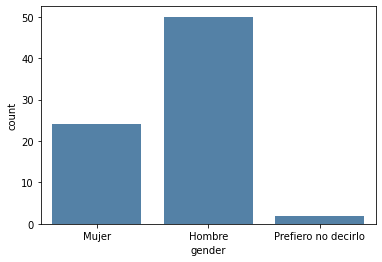

In [4]:
import seaborn
import matplotlib.pyplot as plt

seaborn.countplot(df.gender, color='steelblue')

Para calcular la probabilidad en lugar de la frecuencia de todos las respuestas posbiles para cada columna de una forma más sencilla con la operación *value_counts* de pandas.

In [5]:
data = df['gender'].value_counts(normalize=True).reset_index()
data

,index,gender
0,Hombre,0.657895
1,Mujer,0.315789
2,Prefiero no decirlo,0.026316


Text(0, 0.5, 'Probability')

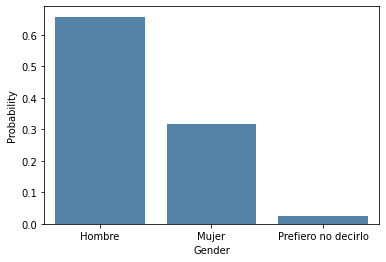

In [6]:
seaborn.barplot(data=data, x='index', y='gender', color='steelblue')
plt.xlabel("Gender")  # Rename the labels on the side of the axis
plt.ylabel("Probability")

## Probabilidad condicional

Ahora podemos pasar a hablar de la probabilidad condicional. La definimos como

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Esto es equivalente a:

$$P(A|B) = \frac{|A \cap B|}{|B|}$$

## Ejercicio 1

Calcular la probabilidad de que una respuesta tenga *gender=Mujer* dado que sabemos que tiene *zodiac_sign=Aries*

In [10]:
count_mujer_and_aries = len(df[(df.gender == 'Mujer') & (df.zodiac_sign == 'Aries')])
pagb = count_mujer_and_aries/len(df.zodiac_sign=='Aries')
print(pagb)

0.42857142857142855


## Independecia

Ahora, para saber si dos conjuntos son independientes, tenemos que comprobar si $P(A|B) = P(A)$ ó $P(A\cap B) = P(A)*P(B)$.

## Ejercicio 2

Calcular si los conjuntos de respuestas con *gender=Mujer* y *zodiac_sign=Aries* son independientes o no, utilizando ambos métodos.



In [18]:
pA = len(df[df.gender=='Mujer'])/len(df['gender'])
pA

0.3157894736842105

In [15]:
pB = len(df[df.zodiac_sign=='Aries'])/len(df.zodiac_sign)
pB

0.09210526315789473